In [3]:
import pandas as pd
import numpy as np


#Creating the dataframe for the year 2021
df_2021 = pd.read_csv('data/waqi-covid19-airqualitydata-2020.csv', skiprows=4, engine='python')

#Creating the dataframe for the year 2020
df_2020Q1 = pd.read_csv('data/waqi-covid19-airqualitydata-2020Q1.csv', skiprows=4, engine='python')
df_2020Q2 = pd.read_csv('data/waqi-covid19-airqualitydata-2020Q2.csv', skiprows=4, engine='python')
df_2020Q3 = pd.read_csv('data/waqi-covid19-airqualitydata-2020Q3.csv', skiprows=4, engine='python')
df_2020Q4 = pd.read_csv('data/waqi-covid19-airqualitydata-2020Q4.csv', skiprows=4, engine='python')
df_2020 = pd.concat([df_2020Q1, df_2020Q2, df_2020Q3, df_2020Q4])

#Creating the dataframe for the year 2019
df_2019Q1 = pd.read_csv('data/waqi-covid19-airqualitydata-2019Q1.csv', skiprows=4, engine='python')
df_2019Q2 = pd.read_csv('data/waqi-covid19-airqualitydata-2019Q2.csv', skiprows=4, engine='python')
df_2019Q3 = pd.read_csv('data/waqi-covid19-airqualitydata-2019Q3.csv', skiprows=4, engine='python')
df_2019Q4 = pd.read_csv('data/waqi-covid19-airqualitydata-2019Q4.csv', skiprows=4, engine='python')
df_2019 = pd.concat([df_2019Q1, df_2019Q2, df_2019Q3, df_2019Q4])

#combining all dataframes
df_2021_2020_2019 = pd.concat([df_2021, df_2020, df_2019])

#Creating the dataframe for the lockdown dates
df_lockdown_dates = pd.read_csv('data/countryLockdowndates.csv', engine='python')
df_lockdown_datesJHUMatch = pd.read_csv('data/countryLockdowndatesJHUMatch.csv', engine='python')

#combining lockdown dates dataframes
df_lockdown_dates_full = pd.concat([df_lockdown_dates, df_lockdown_datesJHUMatch])

#putting the date column in dates format
df_2021_2020_2019['Date'] = pd.to_datetime(df_2021_2020_2019['Date'])

#putting the date column in dates format
df_lockdown_dates_full['Date'] = pd.to_datetime(df_lockdown_dates_full['Date'])

#Checking info from the dataframes
print(df_2021_2020_2019.head())
df_lockdown_dates_full.info()

        Date Country      City     Specie  count   min   max  median  variance
0 2021-07-11      CR  San José  wind-gust     24   1.3  14.0     4.5    118.83
1 2021-04-25      CR  San José  wind-gust     24   1.8  20.3    12.4    251.58
2 2021-05-09      CR  San José  wind-gust     24  12.1  19.5    16.4     53.70
3 2021-07-24      CR  San José  wind-gust     24   0.7   9.6     2.5     47.86
4 2021-01-17      CR  San José  wind-gust     24   4.8  17.5    13.0    111.79
<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  507 non-null    object        
 1   Province        129 non-null    object        
 2   Date            364 non-null    datetime64[ns]
 3   Type            441 non-null    object        
 4   Reference       373 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.8+ K

In [4]:
#Selecting the Specie to use for the analysis
print(df_2021_2020_2019['Specie'].unique())
df_2021_2020_2019_no2 = df_2021_2020_2019[df_2021_2020_2019['Specie']=='no2']

#Selecting the columns to use for the analysis
df_2021_2020_2019_no2 = df_2021_2020_2019_no2[['Date', 'Country', 'median']]

#Droping the null values if they exist
df_2021_2020_2019_no2.dropna(inplace=True)
df_2021_2020_2019_no2.set_index('Date', inplace=True)
df_2021_2020_2019_no2['Country'].unique()

['wind-gust' 'dew' 'temperature' 'humidity' 'pm25' 'pressure' 'wind-speed'
 'so2' 'pm10' 'o3' 'no2' 'precipitation' 'co' 'wd' 'aqi' 'pm1' 'uvi'
 'mepaqi' 'wind speed' 'wind gust' 'neph' 'pol']


array(['EE', 'GR', 'IN', 'NL', 'NO', 'PT', 'CA', 'RU', 'TH', 'IR', 'CZ',
       'HU', 'JP', 'KW', 'RO', 'SA', 'DK', 'BE', 'TR', 'FR', 'MK', 'CL',
       'AR', 'BG', 'HR', 'JO', 'MO', 'FI', 'CN', 'NZ', 'PE', 'PL', 'RE',
       'BR', 'IT', 'MN', 'MX', 'CO', 'GB', 'AE', 'BA', 'SE', 'TW', 'GE',
       'CH', 'AU', 'XK', 'CY', 'HK', 'IS', 'US', 'ZA', 'ES', 'PH', 'SK',
       'VN', 'AT', 'BO', 'DE', 'IL', 'KR', 'RS', 'IE', 'KZ'], dtype=object)

In [5]:
#Creating a function which returns a dataframe for a specific country
def country_df(country_name):
    df = df_2021_2020_2019_no2[df_2021_2020_2019_no2['Country'] == country_name]
    df = df['median']
    return df

<AxesSubplot:xlabel='Date'>

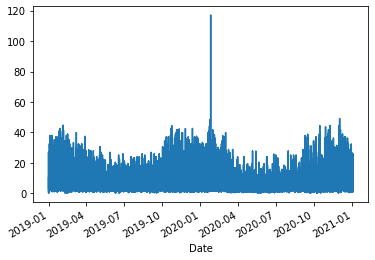

In [6]:
#plotting for visualization
import matplotlib.pyplot as plt
df_US = country_df('US')
plt.figure()
df_US.plot()

<AxesSubplot:xlabel='Date'>

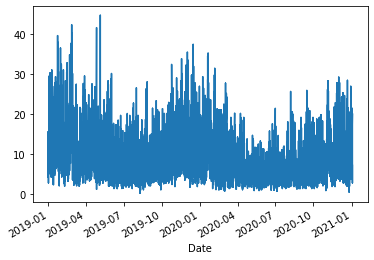

In [7]:
df_GB = country_df('GB')
plt.figure()
df_GB.plot()